# Tweeter Sentiment analysis 

###### Let's install the python client for the official Twitter API

In [1]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [2]:
#pip install pycountry 
import pycountry

'''pycountry is a python library used to access ISO country, subdivision, language, currency etc.
pycountry is an ISO databases for the standards: 639-3 languages. 3166 countries. 3166-3 deleted countries.'''

'pycountry is a python library used to access ISO country, subdivision, language, currency etc.\npycountry is an ISO databases for the standards: 639-3 languages. 3166 countries. 3166-3 deleted countries.'

######  Let's install  textblob python library for processing textual data

In [3]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


######  Let's  install some NLTK corpora 

In [4]:
#python textblob.download_corpora
#python -m textblob.download_corpora

In [5]:
import re #re library is a regualr expression that specifies a set of strings that matches it
import tweepy #tweepy library is a Python Library used for accesing Twitter API
from tweepy import OAuthHandler #OAuthHandler used for twitter to provide Twitter API to authenticate each request.
from textblob import TextBlob #textblob is an open source python library  used for processing textual data.
import matplotlib.pyplot as plt # Matplotlib used to plot data i.e., pie chart etc

#libraries for displaying results in charts 
import pandas as pd
import numpy as np


In [6]:
#authentication keys found on tweeter account
accessToken = "1353371185145405440-RFcjCV61tWceZC2V4m34AOiMdoYcki"
accessTokenSecret = "LRyiTnjYanpkersLgViCUylyIaM3AFVIt9JLQLy3OefJX"
consumerKey = "AiFv3DciTRjSHrIRjVEGIcQEQ"
consumerSecret = "XgczKyKjPBCfnComUyPEtyHuYYWxmXr9RmnXmvMq2GRcg1VcsL"

auth = tweepy.OAuthHandler(consumerKey,consumerSecret )
auth.set_access_token(accessToken,accessTokenSecret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [7]:
# Generic Twitter Class for sentiment analysis.
class TwitterClient(object):
         
     # Class constructor or initialization method.
    def __init__(self):
     #__init__ is a constructor method, constructor is called when an object is created
       
        
        # keys and tokens from the Twitter Dev Console
        consumer_key = 'AiFv3DciTRjSHrIRjVEGIcQEQ'
        consumer_secret = 'XgczKyKjPBCfnComUyPEtyHuYYWxmXr9RmnXmvMq2GRcg1VcsL'
        access_token = '1353371185145405440-RFcjCV61tWceZC2V4m34AOiMdoYcki'
        access_token_secret = 'LRyiTnjYanpkersLgViCUylyIaM3AFVIt9JLQLy3OefJX'
  
        # attempt authentication
        try:
            print("try")
            # create OAuthHandler object
            self.auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
            # set access token and secret
            self.auth.set_access_token(access_token, access_token_secret)
            # create tweepy API object to fetch tweets
            self.api = tweepy.API(self.auth,wait_on_rate_limit=True)
        except:
            print("Error: Authentication Failed")
            
    # Utility function to clean tweet text by removing links, special characters
    def clean_tweet(self, tweet):
     
 # using simple regex statements to clean the text, remove any unnecessary punctuation before performing sentiment analysis.
   
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

    # Utility function to classify sentiment of passed tweet using textblob's sentiment method
    def get_tweet_sentiment(self, tweet):

            # create TextBlob object of passed tweet text
            analysis = TextBlob(self.clean_tweet(tweet))
            # set sentiment
            #if the analysis of the text has a polarity greater than 0, that means the text is positive
            #if the analysis of the text has a polarity that is equal to 0 it means it is neutral
            #else if the analysis of the text has a polarity that is neither greater than 0 or equal to 0, 
            #meaning the polarity is less than 0, it means the text is negative.
            if analysis.sentiment.polarity > 0:
                return 'positive'
            elif analysis.sentiment.polarity == 0:
                return 'neutral'
            elif analysis.sentiment.polarity < 0:
                return 'negative'
        
    
        
            
    # Main function to fetch tweets and parse them.
    #count = 5 , 5 is the default number of tweets to display 
    #if user has not entered number of tweets for sentiment analysis at main function
    def get_tweets(self, query, count = 5):

            # empty list to store parsed tweets
            tweets = []

            try:
                # call twitter api to fetch tweets
                fetched_tweets = self.api.search(q = query, count = count)

                # parsing tweets one by one
                for tweet in fetched_tweets:
                    # empty dictionary to store required params of a tweet
                    parsed_tweet = {}

                    # saving text of tweet
                    parsed_tweet['text'] = tweet.text
                    # saving sentiment of tweet
                    parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text)

                    # appending parsed tweet to tweets list
                    if tweet.retweet_count > 0:
                        # if tweet has retweets, ensure that it is appended only once to avoid duplicates
                        if parsed_tweet not in tweets:
                            tweets.append(parsed_tweet)
                    else:
                        tweets.append(parsed_tweet)
                        
                # VIEW DATAFRAME USING PANDAS
                tweet_list = pd.DataFrame(tweets)
                print("Tweets from PANDAS: " + " ", (tweet_list))
                #PRINTING TWEETS TO ALLOW ME TO DISPLAY RESULTS IN CHARTS         
                
                # return parsed tweets
                return tweets

            except tweepy.TweepError as e:
                # print error (if any)
                print("Error : " + str(e))
                
     
    


In [120]:
def main(query, count = 5): 

    #count 5 is the default value for tweets when the user did not put the number of tweets to do sentiment analysis on 

    # creating object of TwitterClient Class 

    api = TwitterClient() 

    # calling function to get tweets 

    tweets = api.get_tweets(query, count) 

   

    # picking positive tweets from tweets 
    ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive'] 

    # percentage of positive tweets 
    print("\nPositive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))    
    
    # picking negative tweets from tweets 
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative'] 

    # percentage of negative tweets 
    print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets))) 

    
    neutweets = [tweet for tweet in tweets if tweet['sentiment'] == 'neutral'] 
    # percentage of neutral tweets 
    print("Neutral tweets percentage: {} %  ".format(100*(len(tweets) -(len( ntweets )+len( ptweets)))/len(tweets)))        
     
    
    # printing first 10 positive tweets 
    print("\nPositive tweets:")
    for tweet in ptweets[:10]: 
        print(tweet['text'])       

        
    
    print("\n-------------------------------------------------------------------") 
    
        #printing 10 neutral tweets
    print("\nNegative tweets:")
    for tweet in ntweets[:10]: 
        print(tweet['text']) 
    
    print("\n-------------------------------------------------------------------") # space between text
    
    # printing first 10 negative tweets 
    print("\nNeutral tweets:") 
    for tweet in neutweets[:10]: 
        print(tweet['text']) 
        #print(tweet['text_mode='extended'']) 
        #tweet_mode="extended"
        
    print("\n----------------------------Sentiment Analysis Charts----------------------------------------------")
# VIEW DATAFRAME USING PANDAS
    tweet_list = pd.DataFrame(tweets)
    #print("Tweets from PANDAS: " + " ", (tweet_list))
    #PRINTING TWEETS TO ALLOW ME TO DISPLAY RESULTS IN CHARTS
        
        #TRYOUT
    plt.figure(figsize=(9,5)) 
    plt.title("Sentiment Analysis Tweets Chart", fontsize=10, fontweight="bold") #title of chart
    #plt.bar(tweet_list["sentiment"], tweet_list["sentiment"], color = "green")
    plt.plot(tweet_list["sentiment"], color = "green")
    plt.show()
    
    
    
 #===============================================================================================================   
   
        #TRYOUT PRINT POSITIVE TWEETS ONLY
    
    #tweet_list = pd.DataFrame(tweets)
        #TRYOUT
    plt.figure(figsize=(10,5)) 
    plt.title("Sentiment Analysis Tweets Chart", fontsize=10, fontweight="bold") #title of chart
    #plt.bar(tweet_list["sentiment"], tweet_list["sentiment"], color = "green")
    #print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))
    
    plt.hist(tweet_list["sentiment"], bins = 20, density =1,color = "purple")
    plt.xlabel("Sentiment")
    plt.ylabel("percentage % of sentiment analysis tweet")
    
    plt.show()
    
    #DIAPLAY PERCENTAGE OF TWEETS TO HELP READER
    
    # picking positive tweets from tweets 
    ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive'] 

    # percentage of positive tweets 
    print("\nPositive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))    
    
    # picking negative tweets from tweets 
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative'] 

    # percentage of negative tweets 
    print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets))) 

    
    neutweets = [tweet for tweet in tweets if tweet['sentiment'] == 'neutral'] 
    # percentage of neutral tweets 
    print("Neutral tweets percentage: {} %  ".format(100*(len(tweets) -(len( ntweets )+len( ptweets)))/len(tweets)))        
     

        
        
        
        
    #tweet_list = pd.DataFrame(tweet_list)
    
    #PIE CHART ATTEMPT
    #plt.title("POSITIVE Tweets Chart TRYOUT 2", fontsize=12, fontweight="bold")
    #plt.pie(tweet_list['count'],labels = tweet_list, startangle = 90, shadow = True, 
     #      explode = (0, 0, 0.1, 0), radius = 1.2, autopct = '%1.1f%%')
    #plt.legend()
    #plt.show()
    
    
    #---------------------------------------------------------------------------------------------------------


try
Tweets from PANDAS:                                                    text sentiment
0   🔴The UK economy is reeling from three shocks i...  positive
1   RT @WizePenguin: Murdoch / LNP / MORRISON want...  positive
2   Murdoch / LNP / MORRISON wanted Covid-19 to RI...   neutral
3   RT @LeedsUniBSchool: Dr @anninak82 is leading ...   neutral
4   Dr @anninak82 is leading a project on Global V...   neutral
5   @ImSoBrexcited @Sal1A9 @_noblewriter "The UK-b...  negative
6   RT @truesolicitor: @Cornfla91312361 @jk_rowlin...  positive
7   Making visible the care economy (paid and unpa...  positive
8   @Cornfla91312361 @jk_rowling @NicolaSturgeon T...  positive
9   Many managers at UK companies expect to dial b...  positive
10  RT @WizePenguin: Murdoch / LNP / MORRISON want...  positive
11  Freightliner – Keeping the country running\n\n...  positive
12  @bolof2000 Even UK, France &amp; Germany doesn...  negative
13  Murdoch / LNP / MORRISON wanted Covid-19 to RI...   neutral
14  Murdoch / 

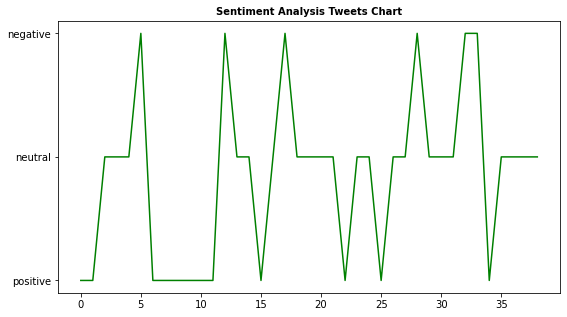

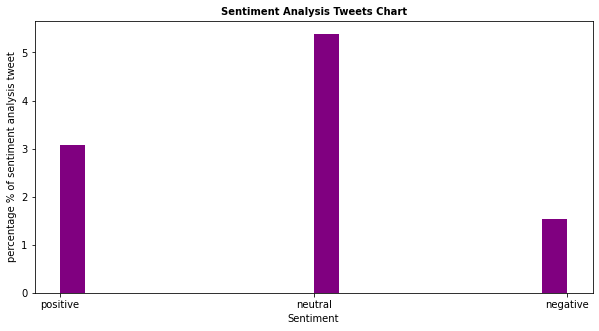


Positive tweets percentage: 30.76923076923077 %
Negative tweets percentage: 15.384615384615385 %
Neutral tweets percentage: 53.84615384615385 %  


In [123]:
main("uk economy covid-19 uk", 100)